# Image Processing 20mm Rods

Import packages

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv.imread('20mm Rods - Dark JPG.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#img = cv.medianBlur(img,5)
img = img[0:1734,:]
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,401,-4)

kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
th2 = cv.erode(th2, kernel, iterations=1)

True

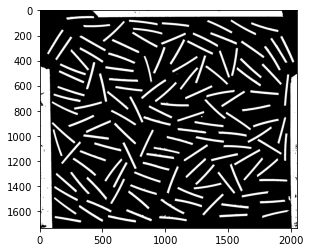

In [3]:
plt.imshow(th2,'gray')
cv.imwrite('threshImage20mm.png', th2)

In [4]:
contours, hierarchy = cv.findContours(th2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [5]:
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
#plt.imshow(cv.drawContours(img_color, contours, -1, (0,255,0), 3),'gray')

In [6]:
import random as rng
rng.seed(12345)
minRect = [None]*len(contours)
lengths = [None]*len(contours)
for i, c in enumerate(contours):
    if c.shape[0] > 10:
        minRectTemp = cv.minAreaRect(c)
        length = max(minRectTemp[1])
        width = min(minRectTemp[1])
        if length < 400.0 and length > 100.0 and length/width > 3:
            minRect[i] = minRectTemp
            lengths[i] = length
        
# Draw contours + rotated rects + ellipses
for i, c in enumerate(contours):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    # contour
    #cv.drawContours(img_color, contours, i, color)
    # rotated rectangle
    box = cv.boxPoints(minRect[i])
    box = np.intp(box) #np.intp: Integer used for indexing (same as C ssize_t; normally either int32 or int64)
    cv.drawContours(img_color, [box], 0, color)

cv.imshow('Contours', img_color)

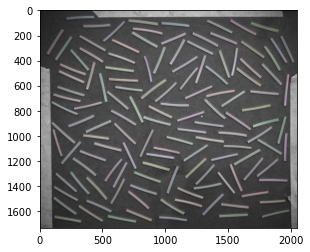

In [7]:
plt.imshow(img_color)

In [8]:
cv.imwrite('shapeImage20mm.png', img_color)

True

In [9]:
res = list(filter(lambda item: item is not None, lengths))

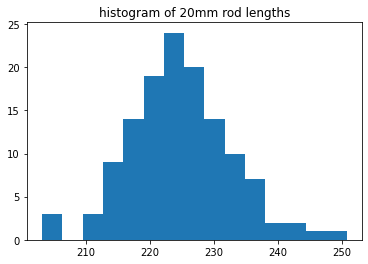

In [10]:
plt.hist(res,bins=15) 
plt.title("histogram of 20mm rod lengths") 
plt.show()

In [11]:
PixelsInCM = 170/1850

In [12]:
lengths_mm = np.multiply(res,PixelsInCM)

In [13]:
np.mean(lengths_mm)

20.646327227055586

In [14]:
np.std(lengths_mm)

0.7256219244670414

In [15]:
lengths_mm.size

129

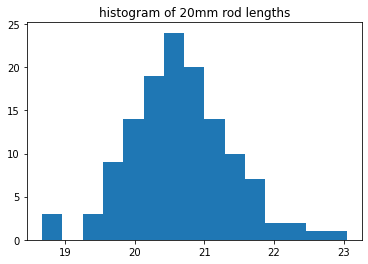

In [16]:
plt.hist(lengths_mm,bins=15) 
plt.title("histogram of 20mm rod lengths") 
plt.show()